In [465]:
% matplotlib inline
import analyze

importlib.reload(analyze)

<module 'analyze' from '/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin/analyze.py'>

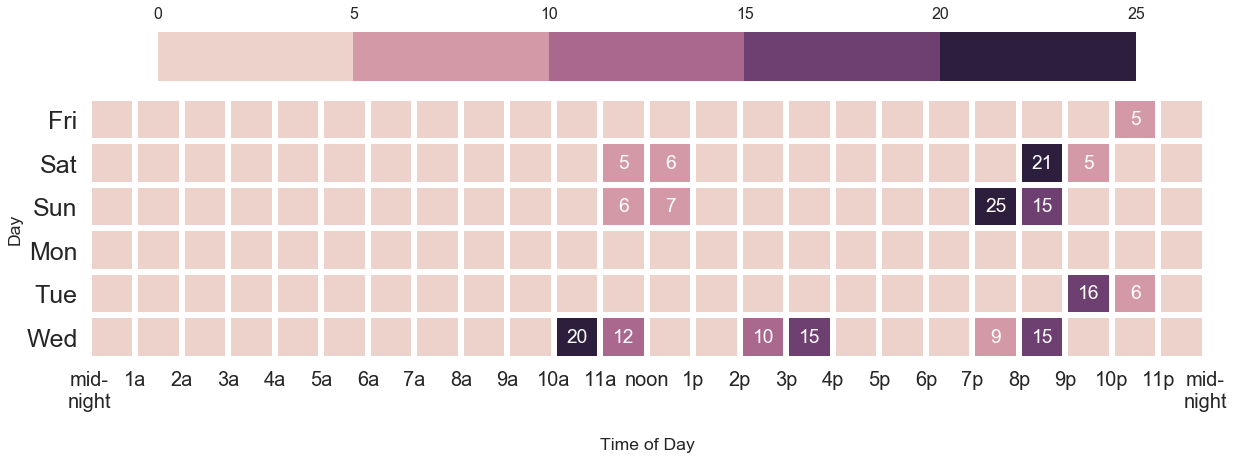

In [466]:
analyze.plot_heatmap(save_filename='extended_heatmap.png')